Lesson2 线性规划

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

    线性规划同样可以解决分类问题。感知机不能解决线性不可分点集的分类问题，此时可以借助线性规划的思想建模。

对于二维的对象：

In [2]:
x1 = np.random.uniform(0,1,20)
diff1 = np.random.normal(0.8,1,20)
y1 = 2*x1 + 5 + diff1
df1 = pd.DataFrame((x1,y1),index = ['x1','x2']).T
df1['y'] = 1

x2 = np.random.uniform(0,1,20)
diff2 = np.random.normal(0.8,1,20)
y2 = 2*x2 + 5 - diff2
df2 = pd.DataFrame((x2,y2),index = ['x1','x2']).T
df2['y'] = -1

data = pd.concat([df1,df2],ignore_index = True)
data

,x1,x2,y
0,0.624844,4.665120,1
1,0.972669,8.435284,1
2,0.045527,6.376422,1
3,0.737396,6.289846,1
4,0.366674,8.262366,1
5,0.596962,6.740651,1
6,0.334078,7.359800,1
7,0.983794,8.091522,1
8,0.082156,8.387285,1
9,0.667364,8.336362,1


<function matplotlib.pyplot.show(close=None, block=None)>

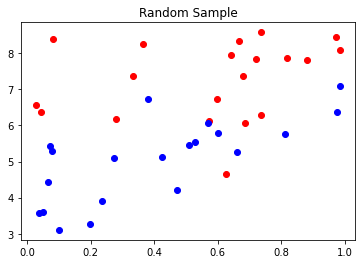

In [3]:
positive_x = data[['x1','x2']][data.y == 1]
negative_x = data[['x1','x2']][data.y != 1]
plt.scatter(positive_x['x1'] , positive_x['x2'] , color = 'r')
plt.scatter(negative_x['x1'] , negative_x['x2'] , color = 'b')
plt.title('Random Sample')
plt.show

使用pulp包来解决线性规划问题

In [4]:
import pulp

初始化一个线性规划问题，起名叫“LP”，目标是最小化解

In [5]:
LP = pulp.LpProblem("LP", pulp.LpMinimize)

In [6]:
data.shape

(40, 3)

定义决策变量

In [7]:
w = pulp.LpVariable.dicts("w" , (i for i in range(data.shape[1]-1)) , 
                          None , cat='Continuous')
b = pulp.LpVariable("b" , None , None , cat='Continuous')
ξ = pulp.LpVariable.dicts("loss" , (i for i in range(len(data))) ,
                          lowBound = 0 , cat = 'Continuous')

定义目标函数

In [8]:
LP += sum(ξ[i] for i in range(len(data)))

定义约束函数集

In [9]:
for i in range(len(data)):
    LP += (w[0]*data['x1'][i] + w[1]*data['x2'][i] + b ) * data['y'][i] + ξ[i] >= 1+0.00000001

In [10]:
LP.solve()
print(pulp.LpStatus[LP.status])

Optimal


In [11]:
for v in LP.variables():
    print(v.name , '=' , v.varValue , '\n')

b = -7.0162681 

loss_0 = 3.3198541 

loss_1 = 0.0 

loss_10 = 0.0 

loss_11 = 0.71256239 

loss_12 = 0.0 

loss_13 = 0.0 

loss_14 = 1.6612185 

loss_15 = 1.3551384 

loss_16 = 0.0 

loss_17 = 0.0 

loss_18 = 0.0 

loss_19 = 0.0 

loss_2 = 0.0 

loss_20 = 0.0 

loss_21 = 0.0 

loss_22 = 0.16300327 

loss_23 = 0.0 

loss_24 = 0.0 

loss_25 = 0.0 

loss_26 = 0.54748186 

loss_27 = 1.0670011 

loss_28 = 0.0 

loss_29 = 0.0 

loss_3 = 1.4766994 

loss_30 = 1.7990738 

loss_31 = 0.57778201 

loss_32 = 0.0 

loss_33 = 0.0 

loss_34 = 0.0 

loss_35 = 0.0 

loss_36 = 0.723669 

loss_37 = 0.0 

loss_38 = 0.0 

loss_39 = 0.14390478 

loss_4 = 0.0 

loss_5 = 0.62620627 

loss_6 = 0.0 

loss_7 = 0.0 

loss_8 = 0.0 

loss_9 = 0.0 

w_0 = -1.9752846 

w_1 = 1.2712767 



In [12]:
ω1 = w[0].varValue
ω2 = w[1].varValue
b = b.varValue

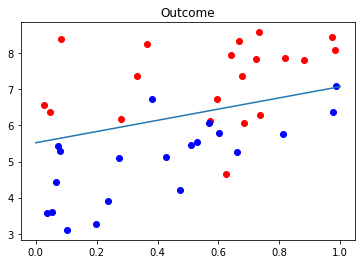

In [13]:
x1 = np.linspace(0,1)
x2 = - ( ω1 * x1 + b ) / ω2
plt.plot(x1 , x2)
positive_x = data[['x1','x2']][data.y == 1]
negative_x = data[['x1','x2']][data.y != 1]
plt.scatter(positive_x['x1'] , positive_x['x2'] , color = 'r')
plt.scatter(negative_x['x1'] , negative_x['x2'] , color = 'b')
plt.title('Outcome')
plt.show()